In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC

In [3]:
np.set_printoptions(precision=3)

In [4]:
df = pd.read_csv('all_samples.csv')
df.drop(columns=['Unnamed: 0', 'name'], inplace=True)
df.head()

,ILMN_1651217,ILMN_1651229,ILMN_1651234,ILMN_1651236,ILMN_1651237,ILMN_1651254,ILMN_1651259,ILMN_1651260,ILMN_1651261,ILMN_1651262,...,ILMN_1815885,ILMN_1815908,ILMN_1815923,ILMN_1815924,ILMN_1815933,ILMN_1815937,ILMN_1815938,ILMN_1815941,ILMN_1815951,CELIAC
0,4.229567,4.802085,4.145582,4.274502,4.268115,6.853804,4.401350,4.123169,4.639975,7.136778,...,4.376735,4.395501,4.338936,5.198647,4.594269,4.264604,4.256310,4.821757,5.005588,1
1,4.197183,4.820311,4.171221,4.332524,4.186809,6.663657,4.559615,4.278860,4.994493,6.803521,...,4.732124,4.417266,4.656831,4.615440,4.594269,4.336589,4.317376,4.518347,4.308311,1
2,4.131493,4.640774,4.075849,4.233316,4.334549,6.694727,4.370504,4.169419,5.093272,6.720391,...,4.292552,4.379864,4.211071,5.530672,4.570808,4.379545,4.241886,4.680351,4.780989,1
3,4.207410,4.508425,4.100585,4.166837,4.530517,6.506971,4.483179,4.242860,5.138309,6.881151,...,4.371180,4.406084,4.186757,5.358646,4.632107,4.282658,4.237614,4.602680,4.637598,1
4,4.245230,4.538779,4.040637,4.266853,4.326313,6.774611,4.409940,4.228860,4.948306,6.847382,...,4.345227,4.488653,4.364008,5.605900,4.624200,4.275774,4.251683,4.686359,4.687048,1


In [5]:
input_cols = list(df.columns[:-1])
inputs = df[input_cols]
target = df['CELIAC']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(inputs, target, stratify=target)
# X inputs (genes), Y target (disease state)
# default test/train split 75/25

In [18]:
svc = SVC(kernel='linear') # only linear models have coef_ and feature_importance_ attributes
rfecv = RFECV(estimator=svc,
              step=0.1, # remove x% of  features at each iteration
              scoring='balanced_accuracy')

In [22]:
rfecv.fit(X_train, Y_train)

RFECV(cv=None,
      estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                    coef0=0.0, decision_function_shape='ovr', degree=3,
                    gamma='scale', kernel='linear', max_iter=-1,
                    probability=False, random_state=None, shrinking=True,
                    tol=0.001, verbose=False),
      min_features_to_select=1, n_jobs=None, scoring='balanced_accuracy',
      step=0.1, verbose=0)

Optimal number of features : 1899


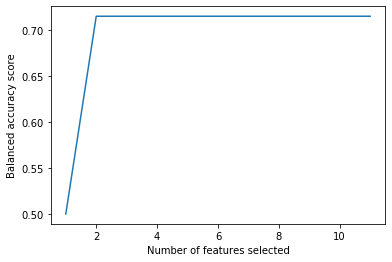

In [24]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Balanced accuracy score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [32]:
svc2 = Pipeline([
    ('feature_selection', SelectKBest(k=2000)),
    ('support_vector_machine', SVC())
])

In [33]:
models = [("SVM-RFE", rfecv),
          ("SVM-KBest", svc2)
         ]

In [34]:
# precision = TP / (TP + FP)
# recall = TP / (TP + FN)
# f1-score: harmonic mean of precision and recall

for name, model in models:
    print(name)
    model = model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    print(classification_report(Y_test, prediction,
                               zero_division=0))
    print(confusion_matrix(Y_test, prediction, 
                           labels=model.classes_,
                          normalize='all'))
    print('\n')

SVM-RFE
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.88      1.00      0.93        28

    accuracy                           0.88        33
   macro avg       0.94      0.60      0.63        33
weighted avg       0.89      0.88      0.84        33

[[0.03  0.121]
 [0.    0.848]]


SVM-KBest
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.85      1.00      0.92        28

    accuracy                           0.85        33
   macro avg       0.42      0.50      0.46        33
weighted avg       0.72      0.85      0.78        33

[[0.    0.152]
 [0.    0.848]]


